<a href="https://colab.research.google.com/github/TheCorporateAIGirl/Auto-Customer-Intelligence/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from google.colab import files

In [2]:
# This will prompt you to select the 'Train.csv' file from your computer
print("Please upload your Train.csv file:")
uploaded = files.upload()

Please upload your Train.csv file:


Saving Train.csv to Train.csv


In [4]:
df = pd.read_csv('Train.csv')
# Drop ID as it's not useful for patterns
data = df.drop(['ID'], axis=1)

In [5]:
# Fill missing values with the most common value (mode)
for col in data.columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [6]:
# Encode categorical text into numbers
le = LabelEncoder()
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [8]:
# Scale the data (important for K-Means)
scaler = StandardScaler()

# Identify and encode any remaining categorical columns that might have been missed
# This ensures all columns are numeric before scaling
for col in data.select_dtypes(include='object').columns:
    print(f"Warning: Column '{col}' is still of object type and will be encoded.")
    data[col] = le.fit_transform(data[col])

scaled_data = scaler.fit_transform(data)

In [9]:
# We'll create 4 segments (High-Flyers, Young Pros, Loyalists, Budgeters)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [10]:
# Add the cluster results back to the original dataframe
df['Segment'] = clusters

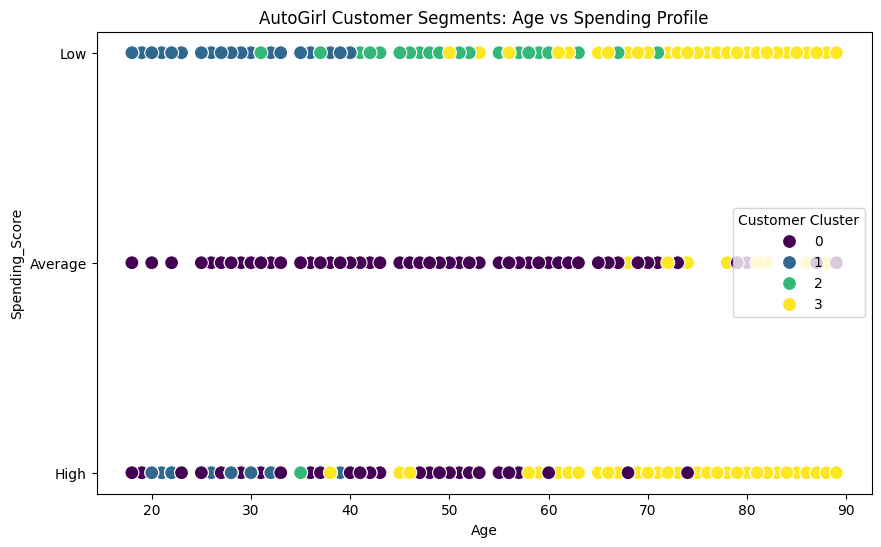

In [11]:
# Visualize: Age vs Spending Score (Typical for Car Rentals)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending_Score', hue='Segment', palette='viridis', s=100)
plt.title('AutoGirl Customer Segments: Age vs Spending Profile')
plt.legend(title='Customer Cluster')
plt.show()

In [12]:
# Print the profile of each segment
print("Segment Profiles:")
print(df.groupby('Segment')[['Age', 'Work_Experience']].mean())

Segment Profiles:
               Age  Work_Experience
Segment                            
0        46.700398         2.563418
1        27.664384         2.875000
2        41.318244         3.235760
3        69.877223         1.206025


In [13]:
# Print the profile of each segment
print("Segment Profiles:")
print(df.groupby('Segment')[['Age', 'Work_Experience']].mean())

Segment Profiles:
               Age  Work_Experience
Segment                            
0        46.700398         2.563418
1        27.664384         2.875000
2        41.318244         3.235760
3        69.877223         1.206025
